# Credits

Originally created for a previous version of the [02456-deep-learning](https://github.com/DeepLearningDTU/02456-deep-learning) course material, but [converted to PyTorch](https://github.com/pytorch/tutorials).
See repos for credits.

In [109]:
## Install pandas if you don't already have it (uncomment line below)

# ! pip install pandas
# ! pip install data-utils

In [110]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize

import data_utils

#import sys
#sys.path.append(os.path.join('.', '..')) # Allow us to import shared custom 
#                                         # libraries, like utils.py

# Tying everything together

Now that you have learned about the three most used network architectures: FFNs, CNNs and RNNs. It is time to combine these network types into a more advanced model. 
It often happens that you have a combination of data that cannot fully be modeled by any one of these three types of network. Knowing how to divide the data into the right subsets, and then build a network that handles each subset efficiently can mean the difference between a great model and an unusable one. 

In this notebook we will work on the **Kaggle Leaf Classification Challenge**, a data science competition from [`kaggle.com`](kaggle.com) that contains several different kinds of data.
First we will download the data and visualize it, and then we will train a network to classify the data.
A simple network with poor performance is provided for you as a starting point, but it is up to you use the things you have learnt to improve the results.


## Kaggle challenge
Kaggle is a website to participate in real life challenges.
Early 2017 it was bought by Google, who wanted access to the global community of data scientists it has created over the last 7 years.
Since then Google has sponsored its expansion and now the prizes of the competitions and the amount of public datasets are bigger than ever. 
Most competitions on Kaggle have a dataset, an accuracy metric and a leaderboard to compare submissions.
You can read more about Kaggle public datasets [here](https://www.kaggle.com/datasets).

The challenge we will pursue is the [_Leaf Classification_](https://www.kaggle.com/c/leaf-classification) challenge.
The dataset consists approximately 1,584 images of leaf specimens which have been converted to binary black leaves against white backgrounds. 
Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample. We will primarily look into the type of neural network best suited for handling this type of data. 

Lastly, we will train the model and put the outputs in a submission file that we can submit to Kaggle.

# Get set up

**NB**: You will need a Kaggle account for this exercise!

1. Go to [Kaggle](https://www.kaggle.com/), create a user
2. [Download the dataset](https://www.kaggle.com/c/leaf-classification/data)
3. Unpack the dataset in the current directory. Structure should be as follows:
```
02456-deep-learning-with-PyTorch\4_Mini_Project
--> sample_submission.csv
--> test.csv
--> train.csv
--> images
--> --> 1.jpg
--> --> 2.jpg
--> --> 3.jpg
--> --> ...
```

# Upload data to colab
If you're running this notebook on google colab, you'll need to upload `data_utils.py` that we provide as well as the data you've just downloaded from kaggle to colab. Small files like `data_utils.py` you can simply upload via the folder icon to the left. Files that are uploaded like this, however, will be deleted every time the runtime deconnects. For big files like the kaggle datafolder it's therefore better to:

1. upload the data to google drive
2. mount the google drive (see cell below)

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After going through a quick authorization process you should now have access to the uploaded file via colab. We can check the location of our data like so:

In [112]:
!ls drive/'My Drive'

'2i HL end of year test (Part 2) (Answers).gdoc'
'3D CAR WORLD'
 ACTIONS
'AndroidStudio Projects'
'ANDROID STUDIO PROJECTS FINAL'
 APKs
 app
 app-debug.apk
 asl_alphabet_test
 asl-alphabet-test-eval
 asl_alphabet_train
 bio
 Blends
 BUSINESS
 Capture2.PNG
 CAS.docx
 CASpdf.pdf
'Cheap glasses alternative to expensive glasses in dk.gdoc'
 CHEM
 chickenrun.apk
'Colab Notebooks'
'Commentary 1.pdf'
 Commentary-3.docx
'Commentary 3 DRAFT.docx'
 com.tdo.showbox_4.65-85.apk
'Copy of macOS 10.12 Sierra Final by TechReviews.rar'
'Copy of Untitled form.gform'
'Danish B HL paper 1.pdf'
'Danish practise.gdoc'
 data30.pickle
 data45.pickle
 data60.pickle
 data.pickle
'Diffraction HL - Copy.docx'
 econ
 ECONOMICS
'EE FINAL.docx'
 english.gdoc
 expenses.gdoc
'Extended Essay Physics .pdf'
 Files
'FINAL PROJECTS'
'FINAL PROJECTS REAL'
'Fractal Ferns YouTube.xlsx.gsheet'
 fuldmagt.pdf
 GEO
 Gestures_1.013121_apk-dl.com.apk
 Hand-ins
'Hedda Gabler references Religion and mythology. (Haseeb).gdoc'
'IA DRAF

Let's save the path for later use. Just replace this with your local path if you're not running on colab.

In [113]:
drive_path = 'drive/My Drive/'
# local_path = ''  # if you're folder structure is as defined above and you want to run locally

# Visualizing the data

First we start out by looking at the images. 
You need to load them first!
Then we load in the training data, which is in CSV format. For this, we use [pandas](https://pandas.pydata.org/).
Pandas is useful for data analysis, but we don't suggest using it in any production code.

In [114]:
image_paths = glob.glob("drive/My Drive/images/*.jpg") # if your path to the 
print("Total Observations:\t", len(image_paths))

# now loading the train.csv to find features for each training point
train = pd.read_csv('drive/My Drive/train.csv')
train_images = ['drive/My Drive/images/{}.jpg'.format(i) for i in train.id.values]

# now loading the test.csv
test = pd.read_csv('drive/My Drive/test.csv')

Total Observations:	 1584


## Exercise 1

1.1) How many samples do we have for training and test? Do we have the same information for training and test data? How many samples do we have for each species?

**Hint** You might want to use .shape, .columns, pd.unique() and .symmetric_difference().


In [115]:
# Your code to produce answers here:
print("Number of training samples:\t", train.shape)
print("Number of test samples:\t", test.shape)

print("Difference:\t", train.columns.symmetric_difference(test.columns))

freqs=train['species'].value_counts().to_dict()
for i in freqs:
  print(i, freqs[i])
# print(train.columns)
# print(len(train.columns))
# print(test.columns)
# print(len(test.columns))
# print(train['species'])

Number of training samples:	 (990, 194)
Number of test samples:	 (594, 193)
Difference:	 Index(['species'], dtype='object')
Populus_Grandidentata 10
Sorbus_Aria 10
Eucalyptus_Neglecta 10
Quercus_Texana 10
Viburnum_x_Rhytidophylloides 10
Cornus_Macrophylla 10
Cornus_Chinensis 10
Quercus_x_Turneri 10
Acer_Mono 10
Callicarpa_Bodinieri 10
Quercus_Pubescens 10
Magnolia_Salicifolia 10
Lithocarpus_Cleistocarpus 10
Alnus_Sieboldiana 10
Acer_Platanoids 10
Eucalyptus_Urnigera 10
Acer_Palmatum 10
Phildelphus 10
Alnus_Cordata 10
Quercus_Vulcanica 10
Alnus_Rubra 10
Ilex_Cornuta 10
Quercus_Greggii 10
Quercus_Brantii 10
Quercus_Chrysolepis 10
Quercus_x_Hispanica 10
Quercus_Coccinea 10
Quercus_Pyrenaica 10
Castanea_Sativa 10
Quercus_Cerris 10
Quercus_Nigra 10
Celtis_Koraiensis 10
Rhododendron_x_Russellianum 10
Acer_Capillipes 10
Quercus_Palustris 10
Quercus_Semecarpifolia 10
Ginkgo_Biloba 10
Crataegus_Monogyna 10
Populus_Adenopoda 10
Quercus_Variabilis 10
Fagus_Sylvatica 10
Salix_Fragilis 10
Quercus_T

 * **Answer:**
**We have 990 samples for training set, 594 for test set. Training set contains one extra column "species". We can see from the output above that there is exactly 10 samples of each species.**

With our training data and images loaded into memory.
It is time to take a look at the data.
Trying to classify leaves does not sound like a particularly difficult or interesting problem.
We have probably all had teachers forcing us to do it on field trips as children.

But try to take a look at **all** the different categories and come up with a system that discern **all** types of leaves from each other. (In fact, distinguishing crops from weed using AI is already a thing: [weed-killing AI](https://www.cnbc.com/2018/06/04/weed-killing-ai-robot.html).)

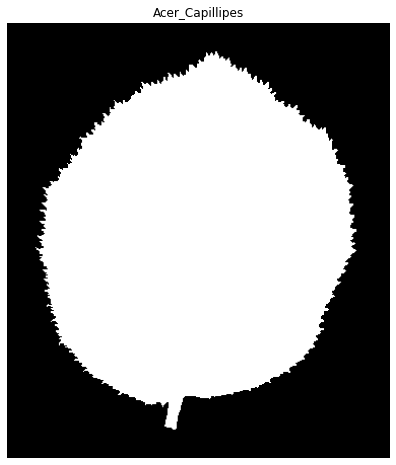

In [116]:
# First we find an example of each species in order to visualize it
species = np.array(sorted(train.species.unique()))

species_examples = [np.random.choice(train[train.species == s].id.values) for s in species]

# Then we gather its' index in our list of images in order to find the correct image

indexes = [image_paths.index(drive_path + 'images/{}.jpg'.format(i)) for i in species_examples]


plt.figure(figsize=(8, 8))
image = imread(image_paths[0], as_gray=True)
plt.imshow(image, cmap='gray')
plt.title("%s" % (species[0]))
plt.axis('off')
plt.show()

## Exercise 2
2.1) In general it is a good approach to visualize an image for each category to get a better feeling of the task. You should now write some code to show 1 image from each category. You might want to use plt.subplot().

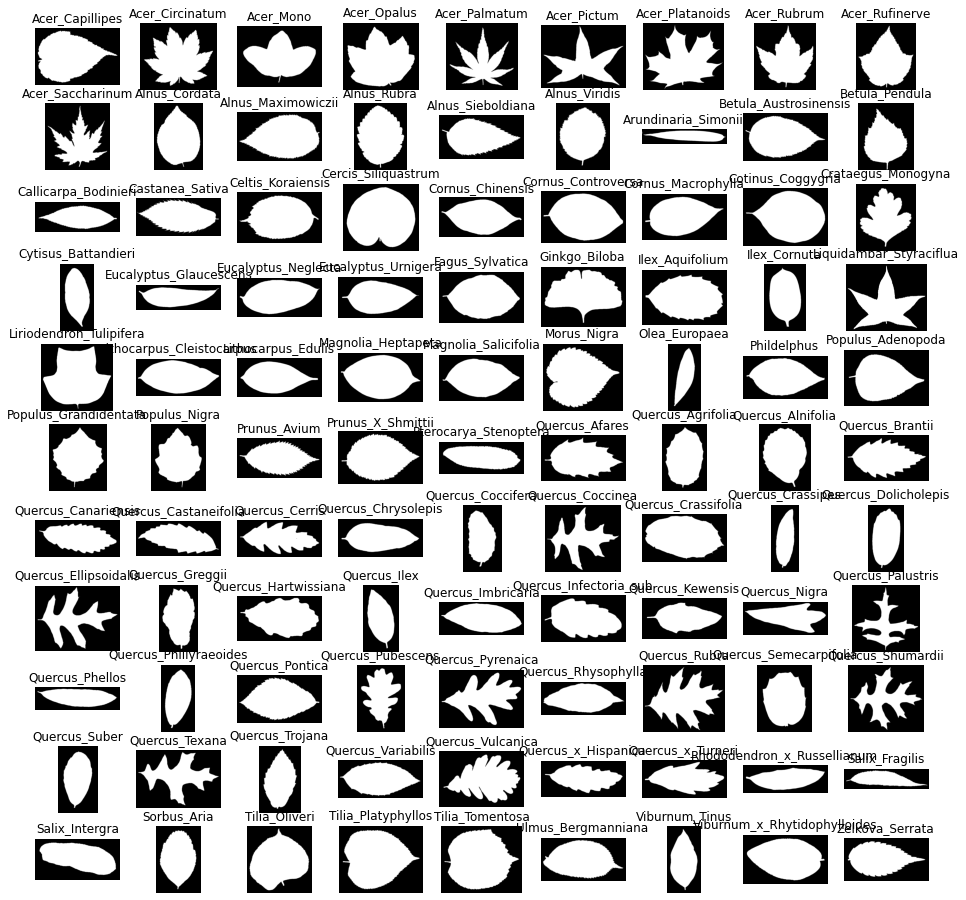

In [117]:
# Now plot 1 image from each category:

# First we find an example of each species in order to visualize it
species = np.array(sorted(train.species.unique()))
species_examples = [np.random.choice(train[train.species == s].id.values) for s in species]

# Then we gather its' index in our list of images in order to find the correct image

indexes = [image_paths.index(drive_path + 'images/{}.jpg'.format(i)) for i in species_examples]

# plt.figure(figsize=(8, 8))
# image = imread(image_paths[indexes[0]], as_gray=True)
# plt.imshow(image, cmap='gray')
# plt.title("%s" % (species[0]))
# plt.axis('off')
# plt.show()


fig, ax = plt.subplots(11, 9, figsize=(16, 16))
k=0
for i in range(11):
    for j in range(9):
        ax[i, j].imshow(imread(image_paths[indexes[k]], as_gray=True),cmap='gray') 
        ax[i, j].set_title("%s" % (species[k]))
        ax[i, j].axis('off')
        k+=1
plt.show()

As you can see, classifying leaves is actually a very tough problem.
What makes it even worse, is that we cannot use all the image data we have available.
In order to decrease the amount of computations needed, we need to reduce the size of the images as much as possible.
On top of that our neural network usually only accepts fixed size input tensors.
This means we will have to change the shape of the images so that they all have the same sizes.


Resizing is problematic because it alters the shape of the leaves, and for some of them, this is their most distinctive feature. Take a look at `Salix_Intergra` in the bottom left corner.
Describing this leaf without taking its' shape into account seems extremely difficult.

Therefore we will 
- 1) first pad all the images into squares, and
- 2) then resize them, as visualized below:

## Exercise 3

3.1) **Find an appropriate image size**. Test various resizings of the image until you have found the smallest resizing of the image where you "can still differentiate between the images".
How small is to small should ultimately be determined by an actual test, but what makes visual sense is a good place to start.
Change the `image_size=(?, ?)` parameter below, and note your choice.
 * **Answer:**


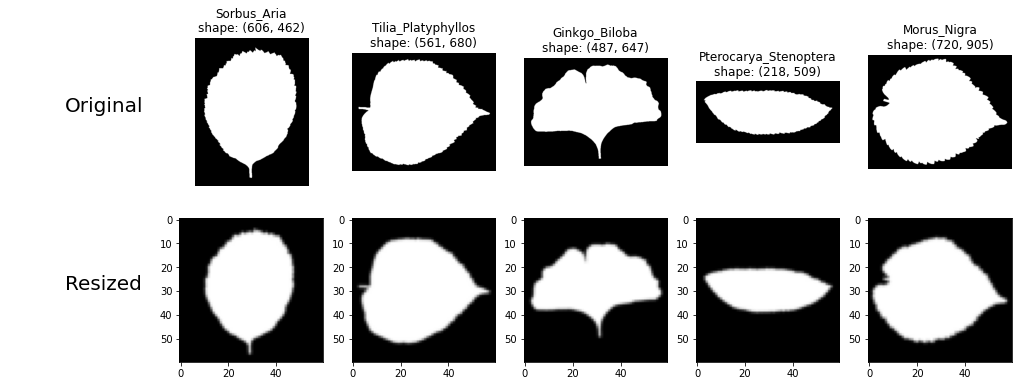

In [118]:
## Image pre-processing
image_size = (60, 60)  # <-- YOUR CODE HERE

# Amount of images
amount = 5
image_sample = np.random.choice(train_images, amount)

# Define figure size
fig = plt.figure(figsize=(18, 6))

# Save original images in the figure
ax = plt.subplot(2, amount + 1, 1)
txt = ax.text(0.4, 0.5, 'Original', fontsize=20)
txt.set_clip_on(False)
plt.axis('off')
for i, path in enumerate(image_sample):
    plt.subplot(2, amount + 1, i + 2)
    image = imread(path, as_gray=True)    
    plt.imshow(image, cmap='gray')
    _id = int(path.split('/')[-1].split('.')[0])
    plt.title("{0}\nshape: {1}".format(train[train.id == _id].species.values[0], image.shape))
    plt.axis('off')
    
# Save resized images in the figure
ax = plt.subplot(2, amount + 1, len(image_sample) + 2)
txt = ax.text(0.4, 0.5, 'Resized', fontsize=20)
txt.set_clip_on(False)
plt.axis('off')
for i, path in enumerate(image_sample):
    i += len(image_sample) + 3
    plt.subplot(2, amount + 1, i)
    image = imread(path, as_gray=True)
    image = data_utils.pad2square(image)  # Make the image square
    image = resize(image, output_shape=image_size, mode='reflect', anti_aliasing=True)  # resizes the image
    plt.imshow(image, cmap='gray')

# Show plot
plt.show()

## Investigating the other features

Now that we have looked at the image data we have available, it is time to take a look at the other available features. Below we choose a random subset of the training data, and visualize the 3 types of available features:
* margin
* shape
* texture

Try to run it a few times to try and get an understanding of how the features differ from species to species.

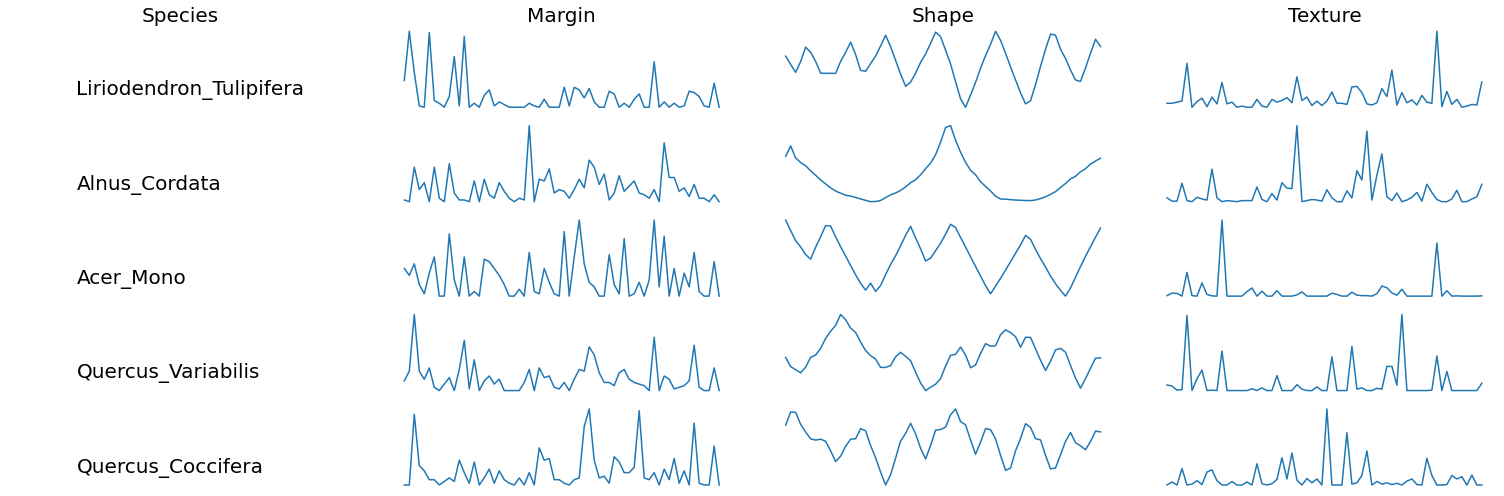

In [119]:
# Extract features
X = train.values
species = X[:, 1:2]
margin = X[:, 2:66]
shape = X[:, 66:130]
texture = X[:, 130:]


# Let us plot some of the features
plt.figure(figsize=(21,7)) # Set the plot size
amount = 5                 # Choose the amount of images we want to show at a time

for i, idx in enumerate(np.random.choice(range(len(train)), amount)):
    ax = plt.subplot(amount,4,1+i*4)
    txt = ax.text(0.2, 0.2, species[idx][0], fontsize=20)
    txt.set_clip_on(False)
    plt.axis('off')
    if i == 0:
        plt.title('Species', fontsize=20)
    plt.subplot(amount,4,2+i*4)
    plt.plot(margin[idx])
    if i == 0:
        plt.title('Margin', fontsize=20)
    plt.axis('off')
    plt.subplot(amount,4,3+i*4)
    plt.plot(shape[idx])
    if i == 0:
        plt.title('Shape', fontsize=20)
    plt.axis('off')
    plt.subplot(amount,4,4+i*4)
    plt.plot(texture[idx])
    if i == 0:
        plt.title('Texture', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Exercise 4
So far we have learned about the feed forward neural network (FFNN), the convolutional neural network (CNN) and the recurrent neural network (RNN).

4.1) How could the `image`, `Margin`, `Shape` and `Texture` be used for classification, i.e. what kind of network type would you use for each of them, and why?
 * **Answer:**
 For image, a CNN would be most appropriate as they are specialised for learning features from images. It would probably be best to use RNN for the margin, shape and texture data. This is because the data is sequential i.e the order matters and the data follows a 'pattern'. RNNs can learn patterns across 'time' and do not disregard the initial data in the sequence even at a much later stage in training. So if the margin for example contains two spikes in the beginning followed by a flat area, they should be able to learn that and use it in prediction. FNNs can probably also be used though but I don't think they would be as successful since they don't take into account the previous patterns in data as RNNs do. \
 

# Managing the data

The details of the code in this section isn't that important.
It simply manages the data in a nice way - so it is a good place to come back and look for inspiration when you going to work on your own projects.


## Defining the data loader

## Exercise 5 
5.1) As a part of the data loader, we should specify the shape of the images, number of classes, and the number of features for the three feature types: margin, shape and texture. Define the three variables in the code below.

In [120]:
# The image shape should be of the format (height, width, channels)
IMAGE_SHAPE =    (image_size[0], image_size[1], 1)# <-- Your answer here
NUM_CLASSES =    99# <-- Your answer here 
print(IMAGE_SHAPE)
# For all three features types margin, shape, and texture, we have NUM_FEATURES for each type.
NUM_FEATURES =  shape.shape[-1] # <-- Your answer here

(60, 60, 1)


In [121]:
# # Paths to data
# TRAIN_PATH = drive_path + "train.csv" 
# TEST_PATH = drive_path + "test.csv" 
# IMAGE_PATHS = glob.glob(drive_path + "images/*.jpg")

# # train holds both X (input) and t (target/truth)
# data = data_utils.load_data(train_path=TRAIN_PATH, 
#                             test_path=TEST_PATH,
#                             image_paths=IMAGE_PATHS,
#                             image_shape=IMAGE_SHAPE[:2])
# # to visualize the size of the dimensions of the data
# print("\n@@@Shape checking of data sets@@@")
# print("TRAIN")
# print("\timages\t%s%f" % (data.train['images'].shape, data.train['images'].mean()))
# print("\tmargins\t%s\t%f" % (data.train['margins'].shape, data.train['margins'].mean()))
# print("\tshapes\t%s\t%f" % (data.train['shapes'].shape, data.train['shapes'].mean()))
# print("\ttextures%s\t%f" % (data.train['textures'].shape, data.train['textures'].mean()))
# print("\tts\t %s" % (data.train['ts'].shape))
# print("\twhile training, batch_generator will onehot encode ts to (batch_size, num_classes)")
# print("TEST")
# print("\timages\t%s\t%f" % (data.test['images'].shape, data.test['images'].mean())) 
# print("\tmargins\t%s\t%f" % (data.test['margins'].shape, data.test['margins'].mean()))
# print("\tshapes\t%s\t%f" % (data.test['shapes'].shape, data.test['shapes'].mean()))
# print("\ttextures%s\t%f" % (data.test['textures'].shape, data.test['textures'].mean()))
# print("\tids\t%s" % (data.test['ids'].shape))

#### Do you want to load your data quickly next time?
In the above cell the data is loaded, reshaped and stored as an object. If you want load this object quickly next time you should go for pickle. Pickle does effectively write an object into a character stream, so it can be loaded fastly next time. Simply replace `drive_path` with you `local_path` if you're not using colab. 

In [122]:
# import pickle

# # Dump the data into a pickle file
# with open(drive_path + '/data45.pickle', 'wb') as f:
#     pickle.dump(data, f)

In [123]:
#Load the data from a pickle file
import pickle
with open(drive_path + '/data60.pickle', 'rb') as f:
    data = pickle.load(f)

## Batch Generator

While training, we will not directly access the entire dataset, instead we have a `batch_generator` function to give us inputs aligned with their targets/ids in a size that our model can handle in memory (batch\_size).

Furthermore, the `batch_generator` also handles validation splitting.

## Exercise 6
6.1) Explain shortly why the size of batches is important. You should comment on how the size of batches affect the memory, training speed, and the estimates of the gradients.
Choose a reasonable batch size the `batch_size = ?` parameter below, and note your choice.

 * **Answer:**
 A small batch size lowers memory usage as we are using a smaller number of data samples. Similarly a large batch size increases memory usage. Training takes less time with a smaller batch size. This is because we are updating parameters more frequently resulting in faster convergence of the loss. The gradient estimate fluctuates more frequently the smaller the batch size as the parameters are updated more frequently. This can result in a less accurate final gradient estimate.    

In [124]:
batch_size = 16
dummy_batch_gen = data_utils.batch_generator(data, batch_size=batch_size, num_classes=NUM_CLASSES, num_iterations=5e3, seed=42)
train_batch = next(dummy_batch_gen.gen_train())
valid_batch, i = next(dummy_batch_gen.gen_valid())
test_batch, i = next(dummy_batch_gen.gen_test())

print("TRAIN")
print("\timages,", train_batch['images'].shape)
print("\tmargins,", train_batch['margins'].shape)
print("\tshapes,", train_batch['shapes'].shape)
print("\ttextures,", train_batch['textures'].shape)
print("\tts,", train_batch['ts'].shape)
print()
print("VALID")
print("\timages,", valid_batch['images'].shape)
print("\tmargins,", valid_batch['margins'].shape)
print("\tshapes,", valid_batch['shapes'].shape)
print("\ttextures,", valid_batch['textures'].shape)
print("\tts,", valid_batch['ts'].shape)
print()
print("TEST")
print("\timages,", test_batch['images'].shape)
print("\tmargins,", test_batch['margins'].shape)
print("\tshapes,", test_batch['shapes'].shape)
print("\ttextures,", test_batch['textures'].shape)
print("\tids,", len(test_batch['ids']))

TRAIN
	images, (16, 60, 60, 1)
	margins, (16, 64)
	shapes, (16, 64)
	textures, (16, 64)
	ts, (16, 99)

VALID
	images, (16, 60, 60, 1)
	margins, (16, 64)
	shapes, (16, 64)
	textures, (16, 64)
	ts, (16, 99)

TEST
	images, (16, 60, 60, 1)
	margins, (16, 64)
	shapes, (16, 64)
	textures, (16, 64)
	ids, 16


# Build the model

In [158]:
# Load functions
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, MaxPool2d, BatchNorm1d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

In [159]:
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")


def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if use_cuda:
        return x.cuda()
    return x


def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

Running GPU.


## Exercise 7
7.1)  Now you must define the network architecture. It is always a good idea to start simple. We recommend you to start with a mix of a convolutional layer (maybe followed by max pooling layer), a recurrent layer, and a linear output layer such that we use all the features.  

When you build the model you should be aware of the dimensions of the input and output for your different layers. The function`permute` and `view` will be very useful to rearrange your dimensions. It might also be useful to look up the helper function for computing convolutional layers' dimensions from lab 4.1. 

In [160]:
height, width, channels = IMAGE_SHAPE

conv_out_channels = 16# <-- Filters in your convolutional layer
kernel_size = 5       # <-- Kernel size
conv_stride = 1      # <-- Stride
conv_pad = 0     # <-- Padding
 
# Keep track of features to output layer
features_cat_size =  4850# <-- Number of features concatenated before output layer
    # 2114 base without pool and img size 15
    # 578 base with 1 pool and img size 15
    # 2882 base with 1 pool and img size of 30
    # 12722 same as above with img size of 60
    # 4786 img size 60, 2 convs and 2 max pools (4850 with extra shape x)
    # 6578 same as above img size of 45
    # 4850
    # 12786
class Net(nn.Module):
  
    def compute_conv_dim(self, dim_size):
        return int((dim_size - kernel_size + 2 * conv_pad) / conv_stride + 1)

    def compute_pool_dim(self, dim_size, s, k):
        return int((dim_size - k)/s + 1)

    def __init__(self):
        super(Net, self).__init__()
        
        self.conv_1 = Conv2d(in_channels=channels,
                             out_channels=conv_out_channels,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)
        
        self.conv_2 = Conv2d(in_channels=16,
                             out_channels=32,
                             kernel_size=kernel_size,
                             stride=conv_stride,
                             padding=conv_pad)

        self.maxpool_1 = MaxPool2d(kernel_size=2, stride=2)

        self.batch_norm_input = nn.BatchNorm2d(num_features=1)

        self.batch_norm_pool1 = nn.BatchNorm2d(num_features=16)

        self.batch_norm_pool2 = nn.BatchNorm2d(num_features=32)


        self.dropout = nn.Dropout2d()


        self.batch_norm_ffnn = nn.BatchNorm1d(num_features=64)

        self.dropout_ffnn = nn.Dropout(p=1.0)


        # Exercise: Add a recurrent unit like and RNN or GRU
        # >> YOUR CODE HERE <<
        self.rnn_1 = nn.LSTM(input_size=128,
                          hidden_size=50,
                          num_layers=1,
                          bidirectional=False)
        

        self.l_out = Linear(in_features=features_cat_size,
                            out_features=NUM_CLASSES,
                            bias=False)

        self.h_1 = Linear(in_features=192, out_features=100, bias=False)
        
    def forward(self, x_img, x_margin, x_shape, x_texture):
        features = []
        out = {}
        

        ## Convolutional layer ##
        # - Change dimensions to fit the convolutional layer 
        # - Apply Conv2d
        # - Use an activation function
        # - Change dimensions s.t. the features can be used in the final FFNN output layer
        

        # print(self.conv_out_height)
        conv1_out = self.compute_conv_dim(height)
        self.l_in_features = conv_out_channels * conv1_out * conv1_out
        pool1_out = self.compute_pool_dim(conv1_out, 2, 2)
        self.l_in_features = conv_out_channels * pool1_out * pool1_out 
        conv2_out = self.compute_conv_dim(pool1_out)
        self.l_in_features = conv_out_channels * conv2_out * conv2_out
        pool2_out = self.compute_pool_dim(conv2_out, 2, 2)
        self.l_in_features = 32 * pool2_out * pool2_out
        

        # permute input (32,15,15,1) => (32,1,15,15)
        x_img = x_img.permute(0, 3, 1, 2)

        ## Batch norm ##
        x_img = self.batch_norm_input(x_img)
        ################

        x_img = relu(self.conv_1(x_img))
        x_img = relu(self.maxpool_1(x_img))
        x_img = self.dropout(x_img)
        x_img = self.batch_norm_pool1(x_img); '''batchnorm'''
        
        
        x_img = relu(self.conv_2(x_img))
        x_img = relu(self.maxpool_1(x_img))
        x_img = self.dropout(x_img)
        x_img = self.batch_norm_pool2(x_img); '''batchnorm'''
        

        features_img = x_img.reshape(-1, self.l_in_features)
        # print('img shape', features_img.shape)
        # >> YOUR CODE HERE <<
        
        # Append features to the list "features"
        features.append(features_img)
        
        
        ## Use concatenated leaf features for FFNN ##
        # print('test', x.shape)
        # print(x_margin.shape)
        # print(x_shape.shape)
        x_margin = self.batch_norm_ffnn(x_margin)
        x_shape = self.batch_norm_ffnn(x_shape)
        x_texture = self.batch_norm_ffnn(x_texture)
        x = torch.cat((x_margin, x_shape, x_texture), dim=1)  # if you want to use features as feature vectors
        # print(x.shape)
        # print('test2', x.shape)
        # print('test2', x.shape)
        # x = self.h_1(x)
        x = relu(x)
        # x = self.dropout_ffnn(x)
        
        

        features.append(x)
        # print('vec shape', features_vector.shape)
        
        ## Use concatenated leaf features for RNN ##
        # - Chage dimensions to fit GRU
        # - Apply GRU
        # - Change dimensions s.t. the features can be used in the final FFNN output layer
        x = torch.cat((x_margin, x_texture), dim=1)  # if you want to use features as feature vectors
        features_vector = x
        features_vector = features_vector.view(features_vector.shape[0], 1, features_vector.shape[1])
        xrn, (h, c) = self.rnn_1(features_vector)

        features_rnn = xrn.view(-1, self.rnn_1.hidden_size)
        # >> YOUR CODE HERE <<
        
        # Append features to the list "features"
        features.append(features_rnn)
        # print('rnn shape', features_rnn.shape)
        
        ## Output layer where all features are in use ##
        features_final = torch.cat(features, dim=1)
        # print('final shape', features_final.shape)
        out['out'] = self.l_out(features_final) 
        return out

net = Net()
if use_cuda:
    net.cuda()
print(net)

Net(
  (conv_1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv_2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm_input): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm_pool1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm_pool2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout2d(p=0.5, inplace=False)
  (batch_norm_ffnn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout_ffnn): Dropout(p=1.0, inplace=False)
  (rnn_1): LSTM(128, 50)
  (l_out): Linear(in_features=4850, out_features=99, bias=False)
  (h_1): Linear(in_features=192, out_features=100, bias=False)
)


# Build the cost function

## Exercise 8
8.1) Since this is a classification task we will use the cross-entropy loss. Define the cross-entropy loss as the loss function in the code below.

In [161]:
LEARNING_RATE = 0.001
# 0.001
criterion = nn.CrossEntropyLoss()          #<-- Your code here.   

# weight_decay is equal to L2 regularization
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE, weight_decay=0.01)

def accuracy(ys, ts):
    
    predictions = torch.max(ys, 1)[1]
    correct_prediction = torch.eq(predictions, ts)
    return torch.mean(correct_prediction.float())

## Test network

#### Debugging 
The following cell might cause you some errors - try these suggestions before you try anyting else.

* **Your kernel keeps dying** on the line below it is most likely because you run out of memory.
The two most likely solutions are 
 1. reduce the image size further
 1. change your network architecture such that it uses less resources

* **`RuntimeError: size mismatch, m1: [??? x ???], m2: [??? x ???]`** 
 1. `features_cat_size` must match the actual output of the network i.e. the second dimension in `m1`.

* **Training is very slow**. This is most likely caused by the images. 
 1. Try and reduce the size of the images further, or reduce the dimensions of the network using either pooling or strides.


In [162]:
_img_shape = tuple([batch_size] + list(IMAGE_SHAPE))
_feature_shape = (batch_size, NUM_FEATURES)

def randnorm(size):
    return np.random.normal(0, 1, size).astype('float32')

# dummy data
_x_image = get_variable(Variable(torch.from_numpy(randnorm(_img_shape))))
_x_margin = get_variable(Variable(torch.from_numpy(randnorm(_feature_shape))))
_x_shape = get_variable(Variable(torch.from_numpy(randnorm(_feature_shape))))
_x_texture = get_variable(Variable(torch.from_numpy(randnorm(_feature_shape))))


# print(_x_image.shape)
# print(_x_margin.shape)
# print(_x_shape.shape)
# print(_x_texture.shape)

# test the forward pass
output = net(x_img=_x_image, x_margin=_x_margin, x_shape=_x_shape, x_texture=_x_texture)
output['out']

tensor([[ 0.4381,  0.6021,  0.5655,  ...,  0.0253,  0.3457,  0.3887],
        [ 0.7306,  0.0875, -0.1014,  ..., -0.1973,  0.4380,  0.0232],
        [ 0.1497, -0.2027, -1.7403,  ...,  1.3686, -0.3556, -0.5692],
        ...,
        [-0.0455, -0.3194, -1.1257,  ..., -0.7518, -0.1661,  0.4948],
        [-0.6169, -0.6191,  0.0549,  ...,  0.2806, -0.6402, -0.4165],
        [-1.1503,  0.3023, -0.3413,  ..., -0.3750, -0.4675,  0.1601]],
       device='cuda:0', grad_fn=<MmBackward>)

# Train

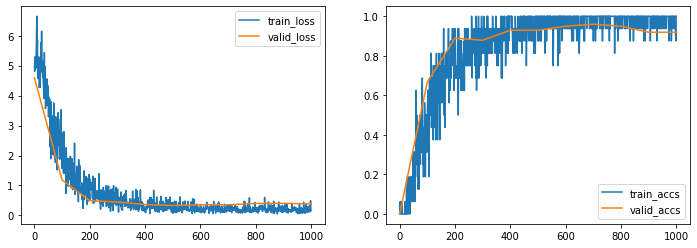

In [163]:
# Setup settings for training 
VALIDATION_SIZE = 0.1 # 0.1 is ~ 100 samples for validation
max_iter = 1000
log_every = 100
eval_every = 100

# Function to get label
def get_labels(batch):
    return get_variable(Variable(torch.from_numpy(batch['ts']).long()))

# Function to get input
def get_input(batch):
    return {
        'x_img': get_variable(Variable(torch.from_numpy(batch['images']))),
        'x_margin': get_variable(Variable(torch.from_numpy(batch['margins']))),
        'x_shape': get_variable(Variable(torch.from_numpy(batch['shapes']))),
        'x_texture': get_variable(Variable(torch.from_numpy(batch['textures'])))
    }

# Initialize lists for training and validation
train_iter = []
train_loss, train_accs = [], []
valid_iter = []
valid_loss, valid_accs = [], []

# Generate batches
batch_gen = data_utils.batch_generator(data,
                                       batch_size=batch_size,
                                       num_classes=NUM_CLASSES,
                                       num_iterations=max_iter,
                                       seed=42,
                                       val_size=VALIDATION_SIZE)

# Train network
net.train()
for i, batch_train in enumerate(batch_gen.gen_train()):
    if i % eval_every == 0:
        
        # Do the validaiton
        net.eval()
        val_losses, val_accs, val_lengths = 0, 0, 0
        for batch_valid, num in batch_gen.gen_valid():
            output = net(**get_input(batch_valid))
            labels_argmax = torch.max(get_labels(batch_valid), 1)[1]
            val_losses += criterion(output['out'], labels_argmax) * num
            val_accs += accuracy(output['out'], labels_argmax) * num
            val_lengths += num

        # Divide by the total accumulated batch sizes
        val_losses /= val_lengths
        val_accs /= val_lengths
        valid_loss.append(get_numpy(val_losses))
        valid_accs.append(get_numpy(val_accs))
        valid_iter.append(i)
#         print("Valid, it: {} loss: {:.2f} accs: {:.2f}\n".format(i, valid_loss[-1], valid_accs[-1]))
        net.train()
    
    # Train network
    output = net(**get_input(batch_train))
    labels_argmax = torch.max(get_labels(batch_train), 1)[1]
    batch_loss = criterion(output['out'], labels_argmax)
    
    train_iter.append(i)
    train_loss.append(float(get_numpy(batch_loss)))
    train_accs.append(float(get_numpy(accuracy(output['out'], labels_argmax))))
    
    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()
    
    # Log i figure
    if i % log_every == 0:
        fig = plt.figure(figsize=(12,4))
        plt.subplot(1, 2, 1)
        plt.plot(train_iter, train_loss, label='train_loss')
        plt.plot(valid_iter, valid_loss, label='valid_loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_iter, train_accs, label='train_accs')
        plt.plot(valid_iter, valid_accs, label='valid_accs')
        plt.legend()
        plt.show()
        clear_output(wait=True)
#         print("Train, it: {} loss: {:.2f} accs: {:.2f}".format(i, train_loss[-1], train_accs[-1]))
        
    if max_iter < i:
        break


In [164]:
print('train loss', train_loss[-1])
print('val loss', valid_loss[-1])

print('train acc', train_accs[-1])
print('final val acc', valid_accs[-1])

train loss 0.24153295159339905
val loss 0.3821892
train acc 0.9375
final val acc 0.9191919


## Exercise 9

**Tip** This is very small dataset (number of observations) compared to the number of features.
This means that overfitting will likely be an issue, and sometimes fancy tricks won't do any good. 
Keep that in mind, and always start out simple.

**3.1) Improve the network**, and get as high a validation score as you can. 
When trying to improve the network nothing is sacred, you can change learning rate, try testing various learning rates, batch sizes, validation sizes, etc. 
And most importantly, the validation set is very small (only 1 sample per class), etc.

To get you of to a good start we have created a list of **things you might want to try**:
* Add more layers (mostly fully connected and convolutional)
* Increase or decrease the batch size 
* Use dropout (a lot - e.g. between the convolutional layers)
* Use batchnormalization (a lot)
* Try with L2 regularization (weight decay)
* Use only the image for training (with CNN) - comment on the increased time between iterations.
* Change the image size to be bigger or smaller
* Try other combinations of FFN, CNN, RNN parts in various ways (bigger is not always better)

If your network is not performing as well as you would like it to, [here](http://theorangeduck.com/page/neural-network-not-working) is a great explanation of what might have gone wrong.


**3.2) Improve Kaggle score**. Once happy try to get the best score on Kaggle for this dataset as you can (**upload** instructions below)
You can upload your solution multiple times as you progress.
A very good implementation would get a score between $0.04$ to $0.06$ (the smaller the better), try and see if you can get there, and explain what might have gone wrong if you cant. 


**3.3) Reflect on the process**, and how you got to your final design and discuss your final results. 
What worked, and what didn't?
Include at least the following: 
* Description of final architecture
* Description of training parameters
* Description of final results (Kaggle and validation)

**Answer:**
Started by adding a pooling layer which sped up training time. 
I experiemnted a bit with image size. I started with image size of 15 which got a pretty high train accuracy of about 1 and val accuracy of about 0.86.
Generally, increasing the image size didn't have much affect on train accuracy but led to lower val accuracy with the same architecture. 
I wanted to know the effect of a more complex model on the results, so with an image size of 60, I ran the base model (1 conv layer + 1 pool layer) and got training accuracy of 1.0 and val accuracy of 0.73. This was clearly a case of overfitting. Then I added an additional conv layer and max pool layer resulting in a lower train accuracy of 0.96 and higher val accuracy of 0.78. Thus it seems like a more complex network helped.

It was still quite clear from the graphs that the model was overfitting as both the val loss and acc plateued after about 100 epochs.

Adding batchnorm between conv layers had no effect. I achieved a training acc of 1.0 and val of 0.75. Adding dropout in between the conv layers seemed to increase val acc to 0.85 though but training acc was still high at 1.0.

I added x_shape data as well to the ffnn and a relu activation. This did not seem to have much effect. Then I added batch norm individually to each input to the ffnn and this seemed to increase val accuracy to 94%. Training loss is still very high though. So further regularization is required.

I tried decreasing batch norm as a form of regularization but it seemed to hurt the validation accuracy too much. I also added a hidden layer for the ffnn but it seemed to negatively affect the validation accuracy and had no effect on training accuracy. Overfitting is still a problem.

The architecture that got the highest kaggle score (0.2) consists of 2 conv layers followed by max pool layers and dropout plus batch normalization between the layers. Batch norm is also present in the ffnn. The batchnorm is 16 and learning rate is 0.001 (default). It led to a validation accuracy of 0.94.

However there was still overfitting so I added weight decay of 0.01, which helped reduce training acc to 0.93 while still maintaining good val acc of 0.91. Unfortunately, the Kaggle score was higher than before (0.39)

# Submission to Kaggle

First we have to make testset predictions, then we have to place it in the submission file and the upload to Kaggle for our score! You can upload at max 5 submissions a day.

In [165]:
# GET PREDICTIONS
# containers to collect ids and predictions
ids_test, preds_test = [], []
net.eval()
# run like with validation
for batch_test, num in batch_gen.gen_test():
    output = net(**get_input(batch_test))
    y_out = output['out'].data

    ids_test += batch_test['ids']
    if num!=len(y_out):
        # in case of the last batch, num will be less than batch_size
        y_out = y_out[:num]
    softmax = nn.Softmax(dim=1)
    y_out = softmax(y_out)
    preds_test.append(y_out.cpu())


preds_test = np.concatenate(preds_test, axis=0)
assert len(ids_test) == len(preds_test)

## Make submission file

In [166]:

preds_df = pd.DataFrame(preds_test, columns=data.le.classes_)
print(preds_test)
# preds_df = preds_df.abs()
ids_test_df = pd.DataFrame(ids_test, columns=["id"])
submission = pd.concat([ids_test_df, preds_df], axis=1)
print(type(submission))



submission.to_csv(drive_path + 'submission.csv', index=False)

# below prints the submission, can be removed and replaced with code block below
submission.head(5)


[[5.38908469e-04 6.95731316e-04 9.25417553e-05 ... 6.85771788e-03
  1.76748963e-05 1.06817548e-04]
 [3.50787886e-05 1.13871603e-04 3.56721168e-04 ... 1.09823632e-04
  3.64922380e-05 6.92985673e-03]
 [2.41911708e-04 8.97379458e-01 6.37245757e-05 ... 1.08085645e-04
  1.21199999e-04 1.91002706e-04]
 ...
 [2.86393391e-04 3.68050416e-04 5.50401805e-04 ... 3.59719008e-04
  2.64884885e-02 1.33447582e-04]
 [1.24474376e-04 3.74357369e-05 1.63102653e-04 ... 3.20049226e-02
  5.79762927e-05 2.09518053e-04]
 [4.30600721e-06 3.21612174e-06 1.66311162e-04 ... 2.43862578e-05
  1.07453241e-06 1.84318142e-05]]
<class 'pandas.core.frame.DataFrame'>


,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,...,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.000539,0.000696,0.000093,0.007588,0.000234,0.000074,0.000084,0.000338,0.004091,0.000831,0.000769,0.000051,0.012151,0.000015,0.000018,0.000112,0.000028,0.007631,0.000207,0.000031,0.000053,0.000073,0.000185,9.541509e-05,0.000155,0.000355,0.000050,9.860526e-06,0.000096,0.000037,0.000077,0.000046,0.000086,0.000057,0.004668,0.000170,0.000130,0.000022,0.000145,...,0.000238,0.000052,0.000129,0.000556,0.000270,0.000148,0.000070,0.000027,0.000035,0.000046,0.000474,0.000058,0.000188,0.000051,0.000052,0.000216,0.000181,0.000063,0.000028,0.000117,0.002791,0.000284,0.000066,0.000081,0.001337,0.000265,0.000248,0.000021,0.000114,1.213888e-05,0.000055,0.000214,0.000737,0.000046,0.000072,0.000037,0.000062,0.006858,0.000018,1.068175e-04
1,7,0.000035,0.000114,0.000357,0.000256,0.000056,0.000206,0.000145,0.000108,0.000106,0.000159,0.000065,0.000082,0.000142,0.004821,0.000026,0.000080,0.000057,0.000094,0.000143,0.000520,0.000040,0.000055,0.000626,2.640573e-05,0.001433,0.000009,0.000030,4.597320e-05,0.000220,0.008987,0.003364,0.000044,0.000610,0.000131,0.000034,0.000147,0.000143,0.000304,0.003463,...,0.000654,0.000116,0.000046,0.000013,0.000452,0.000099,0.000132,0.000068,0.002334,0.001377,0.002775,0.000066,0.000154,0.000022,0.000029,0.001132,0.000081,0.000118,0.001111,0.000490,0.000137,0.000043,0.000335,0.000169,0.000429,0.027158,0.000619,0.021031,0.000786,7.811360e-05,0.000014,0.000969,0.000040,0.000060,0.000074,0.000089,0.000115,0.000110,0.000036,6.929857e-03
2,9,0.000242,0.897379,0.000064,0.002622,0.002222,0.000893,0.005845,0.005804,0.001631,0.001325,0.000225,0.001679,0.000435,0.000018,0.000186,0.000034,0.000264,0.002097,0.000033,0.000057,0.000442,0.000128,0.000040,1.196835e-04,0.000002,0.000372,0.027850,3.241354e-07,0.000026,0.000018,0.000110,0.000049,0.000040,0.001043,0.000061,0.008082,0.006751,0.000021,0.000039,...,0.001050,0.000096,0.000028,0.000025,0.001959,0.000014,0.000785,0.000153,0.000053,0.000013,0.000013,0.000089,0.001514,0.000022,0.000004,0.000184,0.000064,0.000102,0.000022,0.000900,0.000520,0.000102,0.000013,0.000025,0.000102,0.000023,0.001442,0.000014,0.000133,5.106240e-06,0.000103,0.000117,0.000443,0.000274,0.000010,0.005289,0.000355,0.000108,0.000121,1.910027e-04
3,12,0.000020,0.000109,0.000122,0.000110,0.000075,0.000062,0.000131,0.000066,0.000387,0.000148,0.000012,0.001017,0.000277,0.001988,0.000102,0.000028,0.000267,0.000136,0.000320,0.903941,0.000012,0.000030,0.000301,4.861319e-07,0.000128,0.000026,0.000038,6.134316e-05,0.000037,0.000225,0.000114,0.000013,0.000229,0.000103,0.000010,0.000062,0.000044,0.001194,0.000039,...,0.000226,0.000068,0.

## Upload submission

1. Go to [`https://www.kaggle.com/c/leaf-classification/submit`](https://www.kaggle.com/c/leaf-classification/submit)
3. Click or drop your submission here (writing a description is good practice)
4. Submit and look at where you are on the leaderboard.

Success! 